<h1><center>Laboratorio 5: El Pandas no Muerde (act IV) 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Matias Rojas y Mauricio Araneda
- Auxiliar: Ignacio Meza D.
- Ayudante: Rodrigo Ortiz

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Emilio Roa 


\\\### **Link de repositorio de GitHub:** `https://github.com/ERoa98`


## Reglas:

- **Grupos de 2 personas**
- **Ausentes** deberán realizar la actividad solos. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Aplicar los paradigmas y buenas prácticas de programación vistas hasta este momento.
- Comprender y aprovechar las ventajas que nos ofrece la liberia `numpy` con respecto a trabajar en Python 'puro'.
- Visualizar aplicaciones de filtros de imágenes sin el uso de librerías.
- Verificar que el uso indiscriminado de `for` puede afectar en la eficiencia en al procesar datos masivos.


El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `numpy`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre arreglos (*o tensores*).

## Descripción del laboratorio.

### Importamos librerias utiles 😸

In [ ]:
# Libreria Core del lab.
import numpy as np
!pip install --upgrade pandas
!pip install xlrd
!pip install openpyxl
import pandas as pd
import datetime
from scipy import stats

from IPython.display import display, Markdown, Latex

#Libreria para plotear
!pip install --upgrade plotly
!pip install missingno
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.2 MB 5.0 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'MyDrive/Lab5/online_retail_II.pickle'
except: 
    print('Ignorando conexión drive-colab')

Mounted at /content/drive


<p align="center"><iframe width="560" height="315" src="https://www.youtube.com/embed/MW4d8_LLYp8?rel=0&amp;controls=0&amp;showinfo=0" frameborder="1" allowfullscreen></iframe></p>

# Segmentación de Clientes en Tienda de Retail 🛍️

<p align="center">
  <img width=300 src="https://s1.eestatic.com/2018/04/14/social/la_jungla_-_social_299733421_73842361_854x640.jpg">
</p>

## 1.1 Cargar Dataset

Mr. Lepin Mora quien es el gerente de una cotizada tienda de retail en Europa, les solicita si pueden analizar los datos de algunas de sus tiendas y si es posible extraer los diferenciar los tipos de clientes que posee el retail.

Para esto, el área de ventas les entrega el archivo `online_retail_II.xlsx` con el que se les pide que cargue y visualicen algunas de las filas que componen el Dataset.

Realice una primera visualización de los datos y señale los atributos que componen el dataset. Señale las columnas que conforman el dataset, el tipo de variable presente en cada columna y comente que representa cada una de estas.

**Respuesta:**

In [ ]:
df_retail = pd.read_pickle("/content/drive/MyDrive/Lab5/online_retail_II.pickle")
df_retail = df_retail.astype(
    {
        "Invoice": "category",
        "StockCode": "category",
        "Description": str,
        "Customer ID": "category",
    }
)
df_retail.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


## 1.2 Analisís Explotatorio de los Datos [0.5 puntos] 

En base a la primera visualización del dataset, *Don Mora* le solicita que realicen un análisis exploratorio de los datos, para esto les deberán realizar un análisis univariado y multivariado. De la revisión, ustedes deben explicar potenciales anomalías visualizadas y señalar si existe la necesidad de realizar una limpieza de datos.

Explique a que nos referimos con análisis univariable, multivariable y de datos faltantes. ¿Qué beneficios nos otorga estudiar estos datos?. Sea conciso con su respuesta y no escriba mas de 5 líneas para su respuesta.

**Respuesta a la Pregunta:**

> Respuesta Aquí: 

 Con análisis univarible se hace referencia a hacer un analisis para una variable del dataset con el fin de estudiar su comportamiento utilizando distintos métodos (histogramas, plot de densidad, boxplot). Mientras que en un análisis multivariable se hace una comparacion de dos o más variables viendo como estas se comportan entre sí,. Con datos faltantes se hace referencia a ver si hay saltos temporales en alguna de las variables.

### 1.2.1 Análisis Univariado [2 Puntos]

A continuación, se le presentan dos funciones para analizar los datos que componen un dataframe. La primera de estas es la función ``profile_serie()`` la cual recibe una serie y le entrega un análisis detallado de los datos que conforman dicha serie. 

Ejecute la funcion ``profile_serie()`` sobre cada serie para realizar un análisis univariado de estas. A continuación, comente acerca de el comportamiento de cada variable según las estadísticas descriptivas y los gráficos generados.

In [ ]:
from pandas.api.types import is_numeric_dtype
from pandas.core.dtypes.common import is_datetime_or_timedelta_dtype


def profile_serie(serie_in, n_samples=1000, random_state=42):
    serie = serie_in.copy()

    profile = pd.Series(dtype='object')
    profile["Type"] = serie.dtype
    profile = pd.concat([profile, serie.describe(datetime_is_numeric=True)])

    # profile = pd.Series([])

    if is_numeric_dtype(serie):
        profile["Negative"] = (serie < 0).sum()
        profile["Negative (%)"] = (
            str(round((serie < 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Zeros"] = (serie == 0).sum()
        profile["Zeros (%)"] = (
            str(round((serie == 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Kurt"] = serie.kurt()
        profile["Skew"] = serie.skew()

    profile[" "] = " "  # espacio

    profile["Missing cells"] = serie.isnull().sum()
    profile["Missing cells (%)"] = (
        str(round(serie.isnull().sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Duplicate rows"] = serie.duplicated(False).sum()
    profile["Duplicate rows (%)"] = (
        str(round(serie.duplicated(False).sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Total size in memory"] = str(serie.memory_usage(index=True)) + " bytes"

    # profile = pd.concat([profile, description])

    profile = profile.rename(
        index={
            "count": "Number of observations",
            "mean": "Mean",
            "std": "Std",
            "min": "Min",
            "max": "Max",
            "unique": "Unique",
            "top": "Top",
            "freq": "Freq",
        }
    )
    no_outliers_fig = None

    if is_numeric_dtype(serie):

        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(
            sampled_serie, marginal="box", title=f"{serie.name} - With Outliers"
        )

        no_outliers = sampled_serie.loc[(np.abs(stats.zscore(sampled_serie)) < 3)]
        # zscore = https://es.wikipedia.org/wiki/Unidad_tipificada
        
        no_outliers_fig = px.histogram(
            no_outliers, marginal="box", title=f"{serie.name} - Without Outliers"
        )

    elif is_datetime_or_timedelta_dtype(serie):
        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(sampled_serie, marginal="box", title=f"{serie.name}")
    
    else:
        count = (
            serie.value_counts()[0:100]
            .reset_index()
            .rename(columns={"index": serie.name, serie.name: "Count"})
        )
        fig = px.bar(
            x=count[serie.name].astype(str),
            y=count["Count"],
            title=f"100 Most common categories of {serie.name}",
        )
    display(Markdown(f'## {serie.name} Profile'))
    display(profile)
    fig.show()

    if no_outliers_fig:
        no_outliers_fig.show()

    # return fig, profile

In [ ]:
profile_serie(df_retail['Price']) 

## Price Profile

Type                            float64
Number of observations         525461.0
Mean                           4.688834
Std                          146.126914
Min                           -53594.36
25%                                1.25
50%                                 2.1
75%                                4.21
Max                            25111.09
Negative                              3
Negative (%)                      0.0 %
Zeros                              3687
Zeros (%)                         0.7 %
Kurt                       64868.344873
Skew                        -140.768446
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   524485
Duplicate rows (%)              99.81 %
Total size in memory      4203816 bytes
dtype: object

    Análisis de la primera serie...

In [ ]:
for col in df_retail.columns:
    profile_serie(df_retail[col])

## Invoice Profile

Type                           category
Number of observations           525461
Unique                            28816
Top                              537434
Freq                                675
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   517456
Duplicate rows (%)              98.48 %
Total size in memory      2338386 bytes
dtype: object

## StockCode Profile

Type                           category
Number of observations           525461
Unique                             4632
Top                              85123A
Freq                               3516
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525026
Duplicate rows (%)              99.92 %
Total size in memory      1220242 bytes
dtype: object

## Description Profile

Type                                                  object
Number of observations                                525461
Unique                                                  4682
Top                       WHITE HANGING HEART T-LIGHT HOLDER
Freq                                                    3549
                                                            
Missing cells                                              0
Missing cells (%)                                      0.0 %
Duplicate rows                                        525198
Duplicate rows (%)                                   99.95 %
Total size in memory                           4203816 bytes
dtype: object

## Quantity Profile

Type                              int64
Number of observations         525461.0
Mean                          10.337667
Std                           107.42411
Min                             -9600.0
25%                                 1.0
50%                                 3.0
75%                                10.0
Max                             19152.0
Negative                          12326
Negative (%)                     2.35 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                        6277.666908
Skew                          36.044617
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525122
Duplicate rows (%)              99.94 %
Total size in memory      4203816 bytes
dtype: object

## InvoiceDate Profile

Type                                     datetime64[ns]
Number of observations                           525461
Mean                      2010-06-28 11:37:36.845017856
Min                                 2009-12-01 07:45:00
25%                                 2010-03-21 12:20:00
50%                                 2010-07-06 09:51:00
75%                                 2010-10-15 12:45:00
Max                                 2010-12-09 20:01:00
                                                       
Missing cells                                         0
Missing cells (%)                                 0.0 %
Duplicate rows                                   520400
Duplicate rows (%)                              99.04 %
Total size in memory                      4203816 bytes
dtype: object

## Price Profile

Type                            float64
Number of observations         525461.0
Mean                           4.688834
Std                          146.126914
Min                           -53594.36
25%                                1.25
50%                                 2.1
75%                                4.21
Max                            25111.09
Negative                              3
Negative (%)                      0.0 %
Zeros                              3687
Zeros (%)                         0.7 %
Kurt                       64868.344873
Skew                        -140.768446
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   524485
Duplicate rows (%)              99.81 %
Total size in memory      4203816 bytes
dtype: object

## Customer ID Profile

Type                           category
Number of observations         417534.0
Unique                           4383.0
Top                             14911.0
Freq                             5710.0
                                       
Missing cells                    107927
Missing cells (%)               20.54 %
Duplicate rows                   525327
Duplicate rows (%)              99.97 %
Total size in memory      1218250 bytes
dtype: object

## Country Profile

Type                              object
Number of observations            525461
Unique                                40
Top                       United Kingdom
Freq                              485852
                                        
Missing cells                          0
Missing cells (%)                  0.0 %
Duplicate rows                    525461
Duplicate rows (%)               100.0 %
Total size in memory       4203816 bytes
dtype: object

    Análisis de la primera n-esima serie...

### 1.2.2 Análisis Multivariado y Datos Faltantes [1 ptos]

En segundo lugar encontrará la función ``profile_df()`` que recibe un dataframe como entrada y realiza un análisis bivariado de todas las variables numéricas que conforman el dataframe, un analisis de la correlación de Pearson entre las variables numericas del dataframe y la matriz de datos faltantes.

In [ ]:
def profile_df(dataframe_in):
    df = dataframe_in.copy()

    list_type = []
    for col in list(df.columns):
        if is_numeric_dtype(df[col]) or \
        pd.core.dtypes.common.is_datetime_or_timedelta_dtype(df[col]):
            list_type.append(col)

    
    display(Markdown('## Bivariant Analysis:'))
    for i in range(len(list_type)):
        for j in range(i+1, len(list_type)):
            plt.scatter(df[list_type[i]], df[list_type[j]])
            plt.xlabel(list_type[i]) 
            plt.ylabel(list_type[j]) 
            plt.title(f"{list_type[i]} v/s {list_type[j]}")
            plt.show()

    display(Markdown('## Correlation:'))
    fig_corr = px.imshow(df.corr())
    fig_corr.show()

    display(Markdown('## Missing Matrix:'))
    fig, ax = plt.subplots(figsize=[15, 10])
    msno.matrix(df, ax=ax, sparkline=False)

## Bivariant Analysis:

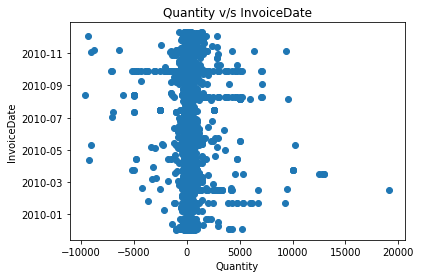

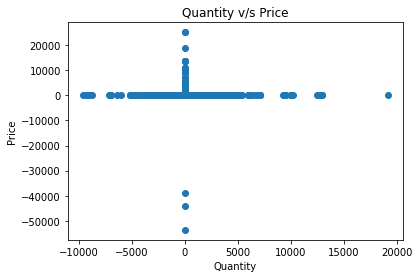

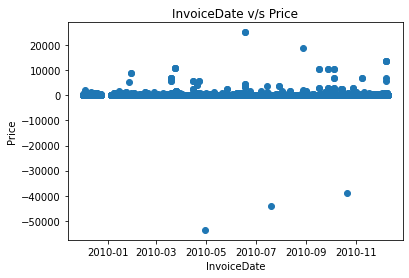

## Correlation:

## Missing Matrix:

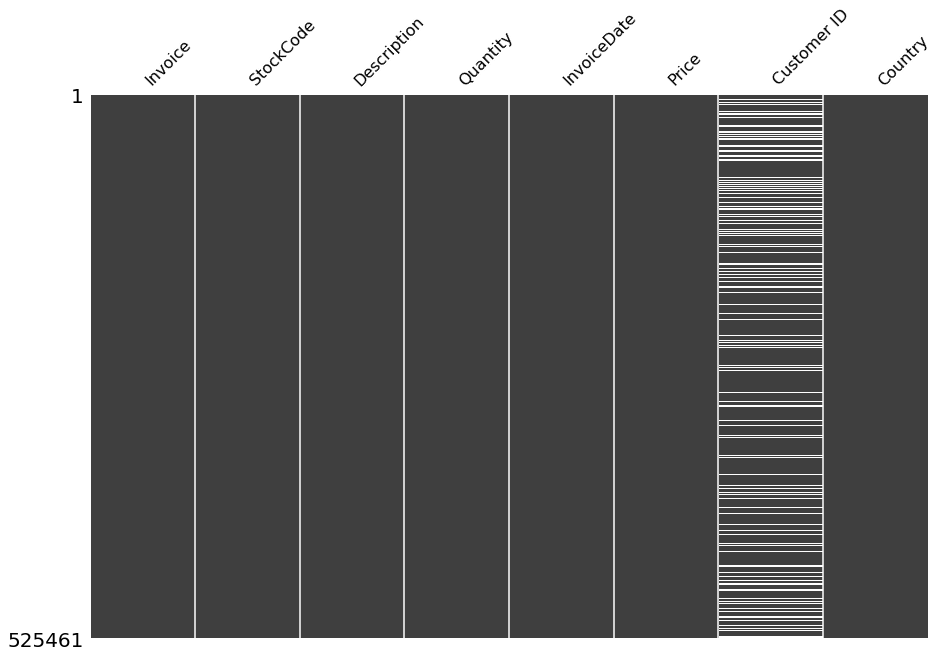

In [ ]:
profile_df(df_retail)

### 1.2.3 Limpieza de Datos [1 pto]

Como pudo ver en las secciones anteriores, los datos presentan valores erroneos, es por esto que se le solicita que realice una función que permita limpiar el dataset. Realice esta función en base observaciones propias y considere como imposible tener cantidades negativas en las ventas.

Una vez realizada la función, realice nuevamente el análisis exploratorio y comente las principales diferencias.

**Respuesta:**

In [ ]:
def clean_data(df_in):
    df=df_in.copy()
    df = df.dropna()
    df = df[(df["Quantity"]>0) & df["Price"]>0]
    df.reset_index(drop=True, inplace=True)
    return df

In [ ]:
df_retail_clean=clean_data(df_retail)

In [ ]:
for col in df_retail_clean.columns:
    profile_serie(df_retail_clean[col])

## Invoice Profile

Type                           category
Number of observations           407664
Unique                            19213
Top                              500356
Freq                                270
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   405936
Duplicate rows (%)              99.58 %
Total size in memory      2102792 bytes
dtype: object

## StockCode Profile

Type                          category
Number of observations          407664
Unique                            4017
Top                             85123A
Freq                              3153
                                      
Missing cells                        0
Missing cells (%)                0.0 %
Duplicate rows                  407506
Duplicate rows (%)             99.96 %
Total size in memory      984648 bytes
dtype: object

## Description Profile

Type                                                  object
Number of observations                                407664
Unique                                                  4444
Top                       WHITE HANGING HEART T-LIGHT HOLDER
Freq                                                    3153
                                                            
Missing cells                                              0
Missing cells (%)                                      0.0 %
Duplicate rows                                        407462
Duplicate rows (%)                                   99.95 %
Total size in memory                           3261440 bytes
dtype: object

## Quantity Profile

Type                              int64
Number of observations         407664.0
Mean                          13.585585
Std                           96.840747
Min                                 1.0
25%                                 2.0
50%                                 5.0
75%                                12.0
Max                             19152.0
Negative                              0
Negative (%)                      0.0 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                        9572.064923
Skew                          79.917702
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   407550
Duplicate rows (%)              99.97 %
Total size in memory      3261440 bytes
dtype: object

## InvoiceDate Profile

Type                                     datetime64[ns]
Number of observations                           407664
Mean                      2010-07-01 10:15:11.871688192
Min                                 2009-12-01 07:45:00
25%                                 2010-03-26 14:01:00
50%                                 2010-07-09 15:47:00
75%                                 2010-10-14 17:09:00
Max                                 2010-12-09 20:01:00
                                                       
Missing cells                                         0
Missing cells (%)                                 0.0 %
Duplicate rows                                   406199
Duplicate rows (%)                              99.64 %
Total size in memory                      3261440 bytes
dtype: object

## Price Profile

Type                            float64
Number of observations         407664.0
Mean                           3.294438
Std                           34.757965
Min                               0.001
25%                                1.25
50%                                1.95
75%                                3.75
Max                             10953.5
Negative                              0
Negative (%)                      0.0 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                       63865.331746
Skew                         235.066862
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   407478
Duplicate rows (%)              99.95 %
Total size in memory      3261440 bytes
dtype: object

## Customer ID Profile

Type                          category
Number of observations        407664.0
Unique                          4312.0
Top                            14911.0
Freq                            5570.0
                                      
Missing cells                        0
Missing cells (%)                0.0 %
Duplicate rows                  407573
Duplicate rows (%)             99.98 %
Total size in memory      982656 bytes
dtype: object

## Country Profile

Type                              object
Number of observations            407664
Unique                                37
Top                       United Kingdom
Freq                              370929
                                        
Missing cells                          0
Missing cells (%)                  0.0 %
Duplicate rows                    407664
Duplicate rows (%)               100.0 %
Total size in memory       3261440 bytes
dtype: object

## Bivariant Analysis:

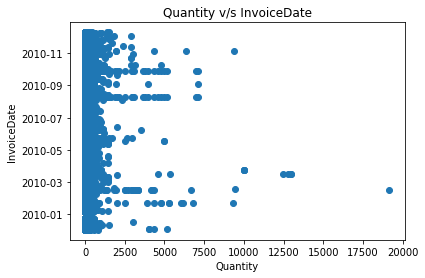

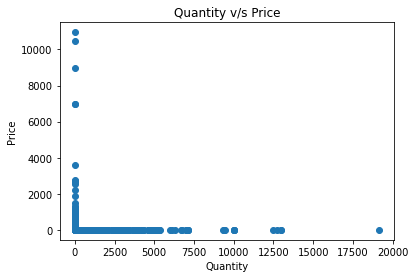

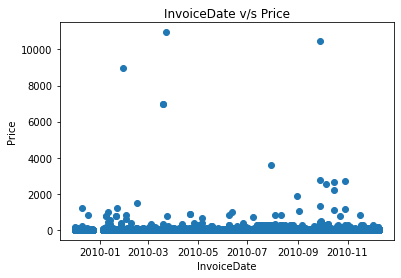

## Correlation:

## Missing Matrix:

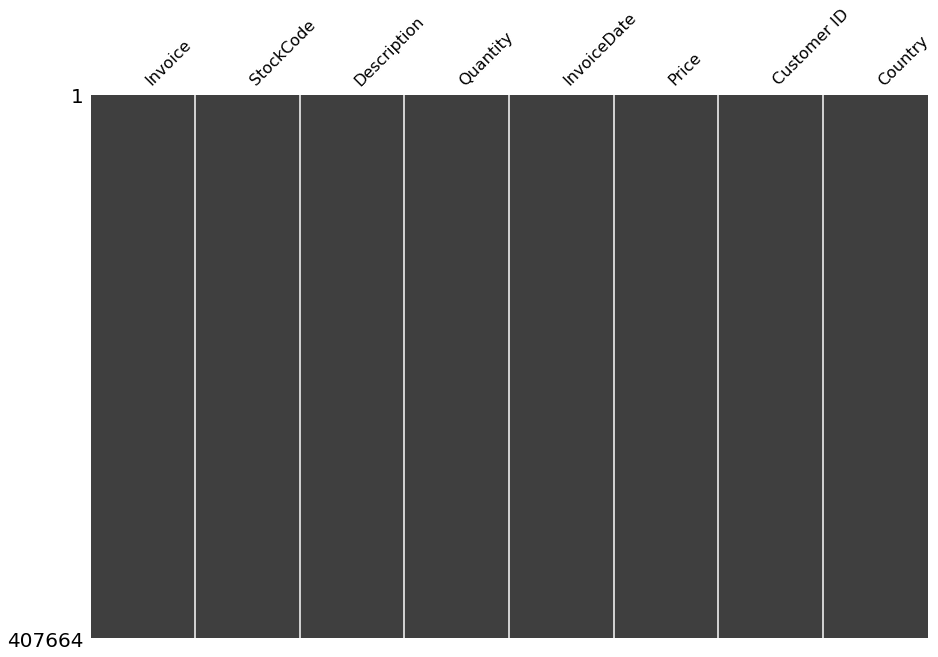

In [ ]:
profile_df(df_retail_clean)

* Análisis

Dentro de los primeros gráficos y perfiles de los atributos se puede ver que disminuyen mucho los datos al eliminar las filas con Nans. Luego en los perfiles de los atributos Quantity y Price se ve un cambio en los valores mínimos dado que se eliminan todos los datos con cantidades y precios negativos, los cuales claramente se encontraban mal indexados y no aportaban al análisis descriptivo de estos atributos. Esto último también aporta a una mejor visualización del análisis multivariable cuando se consideran los atributos de Quantity y Price. Por último la Missing Matrix no muestra ningún espacio de error dentro de los atributos, por lo que la limpieza de los datos resultó exitosa.

### 1.2.4 Obtención de TOPs [0.75 ptos]

Sin considerar los comentarios realizados en la sección 1.2 , *Don Mora* les pide obtener el **Top de 30 productos que generan más ganancias** para la tienda de retail. Deben considerar todo el registro temporal presente en el dataset y entregar la información en un gráfico de barras de los ingresos/cantidades v/s el nombre de los productos (Utilice `plotly`). ¿Los artículos más vendidos son los mismos que generan más ganancias?, Comente los resultados obtenidos.

**Resultados:**

In [ ]:
df_retail_clean['Ingresos']=df_retail_clean.Quantity*df_retail_clean.Price
df_top_30=df_retail_clean.groupby('Description')[['Ingresos']].agg('sum')
df_top_30['Quantity']=df_retail_clean.groupby('Description')['Quantity'].agg('sum')
df_top_30=df_top_30.sort_values('Ingresos', ascending=False).head(30)

In [ ]:
fig = px.bar(df_top_30,
             x=df_top_30.index,
             y=['Ingresos', 'Quantity'],
             title="Top de 30 productos que generan más ganancias", 
             barmode='group'
)
fig.show()

Al realizar un análisis de la curva en ambas variables (Ingresos y Quantity), es posible ver que el comportamiento no es el mismo, pues no siguen la misma relación. Frente a esto, es posible inferir que los productos más vendidos no son precisamente los que generan más ganancias. Algunos ejemplos más claros de esto son las ventas de MANUAL (TOP 3) y POSTAGE (TOP 6) los cuales no superan las 3 mil unidades vendidas y se encuentran dentro de los productos que más ganancias generan.

### 1.2.5 Visualización del registro temporal [0,75 ptos]

El dueño del retail en su afán por saber más sobre los datos de su firma les solicita que grafiquen las ventas respecto al tiempo. Con esto les aclara que durante el día tienen muchas variaciones en sus ventas, por lo que les recomienda que consideren el registro temporal como `año-mes-día`. ¿Es posible observar datos extraños?, Comente lo que observa del gráfico.

In [ ]:
df_aux=df_retail_clean.copy()
df_aux.InvoiceDate=df_aux.InvoiceDate.dt.strftime('%Y-%m-%d')
df_aux=df_aux.groupby('InvoiceDate')['Quantity'].agg('sum').reset_index()

In [ ]:
def plot_ventas(dataframe):
    fig = px.line(
        dataframe,
        x='InvoiceDate',
        y='Quantity',
        title="Ventas respecto al tiempo", 
    )
    fig.show()

In [ ]:
plot_ventas(df_aux)

Dentro del gráfico es posible ver algunos picos de ventas asociados a fechas particulares los cuales se destacan en demacía con respecto al resto de los días, pero no es trivial entender el por qué. Esto puede estar asociado a días de grandes ofertas, fechas de festividad o incluso eventos relacionados a ganancias de los usuarios, entre muchos otros.

Fuera de lo anteriormente mencionado, también se puede ver que no existen datos de fechas como Navidad o Año Nuevo, los cuales se puede deber a que no se realizaron ventas debido a las fiestas.

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana y que **los días de atraso no se pueden utilizar para entregas de lab** solo para tareas. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://i.pinimg.com/originals/65/ae/27/65ae270df87c3c4adcea997e48f60852.gif "bruno")


<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>